<a href="https://colab.research.google.com/github/Virtualexistence/Time-Series-Forecasting-Model/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Installations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error as mse
from pandas.plotting import autocorrelation_plot as ap
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv('daily-total-female-births-CA.csv', parse_dates=[0])

In [ ]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
series=pd.read_csv('daily-total-female-births-CA.csv', parse_dates=[0], index_col=[0], squeeze=True)

Since, series only takes one columns it's not needed to show. Thus the shape is shown as (365,) while data as (365,1)

In [ ]:
print(data.shape)
print(series.shape)

(365, 2)
(365,)


In [ ]:
series['1959-01']

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64

**Feature Engineering**


*   Date Time feature
*   Lag feature
* Window feature
>* Rolling Window
>* Expanding Window






In [ ]:
feature = data.copy()

In [ ]:
feature['year']=feature['date'].dt.year
feature['month']=feature['date'].dt.month
feature['day']=feature['date'].dt.day

In [ ]:
feature.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


Lag Features

In [ ]:
feature['lag1']=feature['births'].shift(1)
feature['lag2']=feature['births'].shift(365)

In [ ]:
feature.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


Rolling feature

In [ ]:
feature['Roll_mean']=feature['births'].rolling(window=2).mean()
feature['Roll_max']=feature['births'].rolling(window=3).max()
feature.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


Expanding feature

In [ ]:
feature['Expand_max']=feature['births'].expanding().max()
feature.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


In [ ]:
help(feature.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window: 'int | timedelta | BaseOffset | BaseIndexer', min_periods: 'int | None' = None, center: 'bool_t' = False, win_type: 'str | None' = None, on: 'str | None' = None, axis: 'Axis' = 0, closed: 'str | None' = None, method: 'str' = 'single') method of pandas.core.frame.DataFrame instance
    Provide rolling window calculations.
    
    Parameters
    ----------
    window : int, offset, or BaseIndexer subclass
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
    
        If a BaseIndexer subclass is passed, calculates the window boundaries
        based on the defined ``get_window_bounds`` method

In [ ]:
help(feature.expanding)

Help on method expanding in module pandas.core.generic:

expanding(min_periods: 'int' = 1, center: 'bool_t | None' = None, axis: 'Axis' = 0, method: 'str' = 'single') -> 'Expanding' method of pandas.core.frame.DataFrame instance
    Provide expanding transformations.
    
    Parameters
    ----------
    min_periods : int, default 1
        Minimum number of observations in window required to have a value
        (otherwise result is NA).
    center : bool, default False
        Set the labels at the center of the window.
    axis : int or str, default 0
    method : str {'single', 'table'}, default 'single'
        Execute the rolling operation per single column or row (``'single'``)
        or over the entire object (``'table'``).
    
        This argument is only implemented when specifying ``engine='numba'``
        in the method call.
    
        .. versionadded:: 1.3.0
    
    Returns
    -------
    a Window sub-classed for the particular operation
    
    See Also
    ----

# Re-Sampling

In [ ]:
miles_df=pd.read_csv('us-airlines.csv', parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


**Downsampling**


In [ ]:
quaterly_miles_df = miles_df.resample('Q', on='Month').mean()
quaterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [ ]:
annual_miles_df = miles_df.resample('A', on='Month').mean()
annual_miles_df.head()

,MilesMM
Month,
1963-12-31,8300.250000
1964-12-31,8849.333333
1965-12-31,9619.250000
1966-12-31,9929.500000
1967-12-31,10542.916667


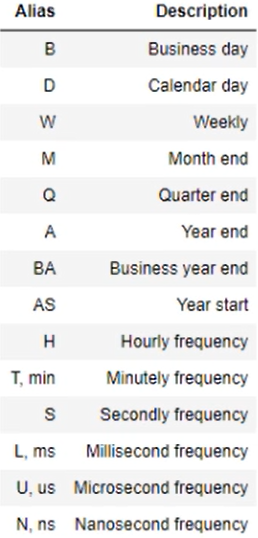

In [ ]:
help(miles_df.resample)

**Up-Sampling**

In [ ]:
upsample_data = miles_df.resample('D', on='Month').mean()
upsample_data.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [ ]:
interpolated_df = upsample_data.interpolate(method='linear')
interpolated_df.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065


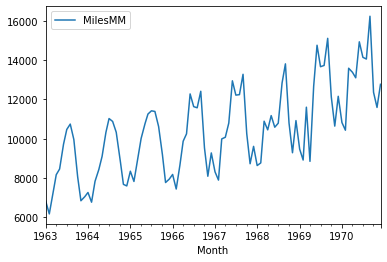

In [ ]:
interpolated_df.plot()

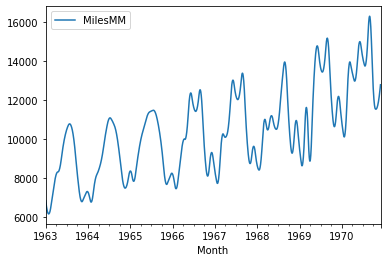

In [ ]:
interpolated_df = upsample_data.interpolate(method='spline', order=2)
interpolated_df.plot()

# Time Series Visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
viz = pd.read_csv("daily-total-female-births-CA.csv", parse_dates=[0], index_col=[0])
viz.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


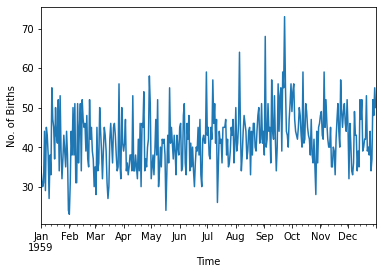

In [ ]:
viz['births'].plot(xlabel='Time', ylabel='No. of Births')

Zooming In

In [ ]:
zoom = viz.loc['1959-01-01':'1959-01-30']
zoom.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


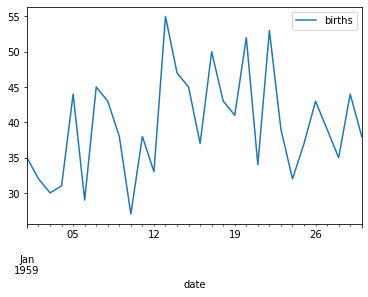

In [ ]:
zoom.plot()

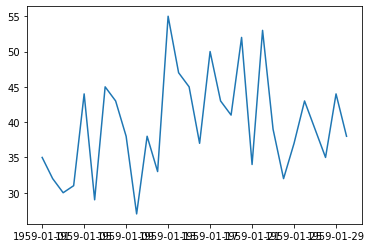

In [ ]:
fig,ax=plt.subplots()
ax.plot(zoom.index.values,zoom['births'])

Trenlines

In [ ]:
import seaborn as sns

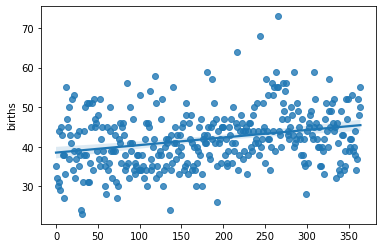

In [ ]:
sns.regplot(x=data.index.values, y=data['births'])

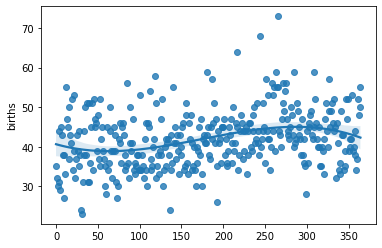

In [ ]:
sns.regplot(x= data.index.values, y=data['births'], order=3)

In [ ]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


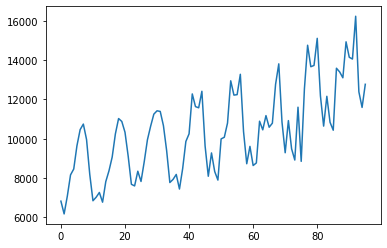

In [ ]:
miles_df['MilesMM'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


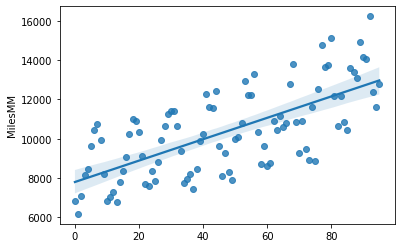

In [ ]:
sns.regplot(miles_df.index.values, miles_df['MilesMM'])

Supress Seasonality

In [ ]:
miles_df['year']=miles_df['Month'].dt.year
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [ ]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

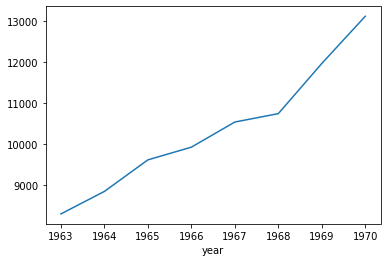

In [ ]:
miles_df.groupby('year')['MilesMM'].mean().plot()

Creating Lag plots

In [ ]:
miles_df['lag']=miles_df['MilesMM'].shift(1)
miles_df.head()

,Month,MilesMM,year,lag
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


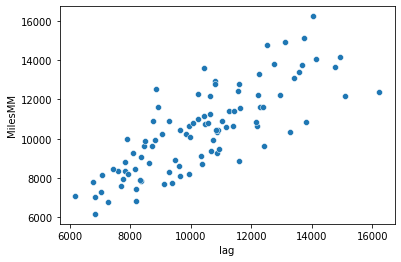

In [ ]:
sns.scatterplot(x=miles_df['lag'], y=miles_df['MilesMM'])

In [ ]:
from pandas.plotting import lag_plot

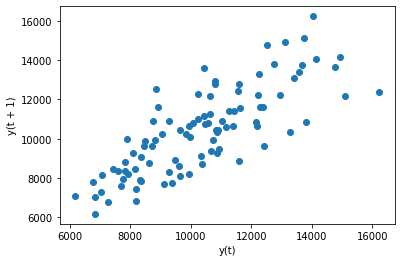

In [ ]:
lag_plot(miles_df['MilesMM'])

In [ ]:
from pandas.plotting import autocorrelation_plot as ap

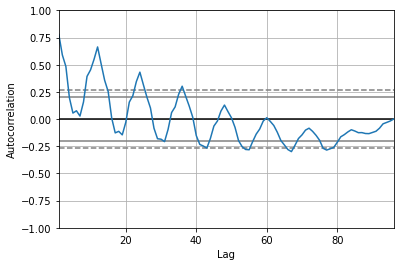

In [ ]:
ap(miles_df['MilesMM'])

Auto-Corelation is necessary since this'll give the dependence of the 2 values in the series. With this method we can see the relation between the current and lag values.

This plot gives the correlation of all the lag values with the value in "MilesMM'. The dips we see are due to 'seasonality'

# Decompostion of Time Series

**Additive Model** y(t)=Level + Trend + Seasonality + Noise

---


**Multiplicative Model** y(t)=Level x Trend x Seasonality x Noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [ ]:
miles=pd.read_csv("us-airlines.csv", parse_dates=[0], index_col=[0])

In [ ]:
miles.head()

,MilesMM
Month,
1963-01-01,6827
1963-02-01,6178
1963-03-01,7084
1963-04-01,8162
1963-05-01,8462


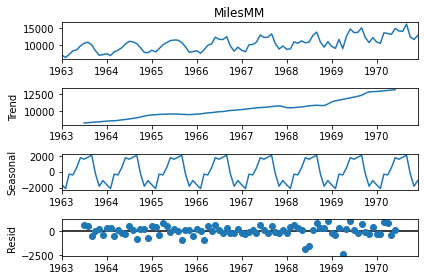

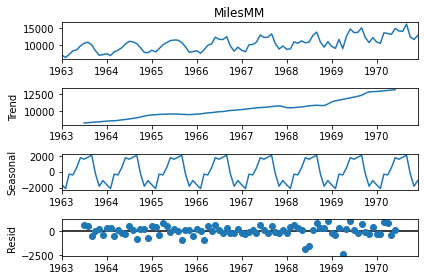

In [ ]:
results=seasonal_decompose(miles['MilesMM'], model='additive')
results.plot()

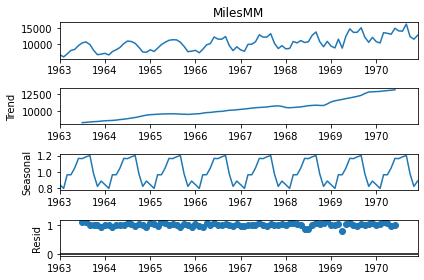

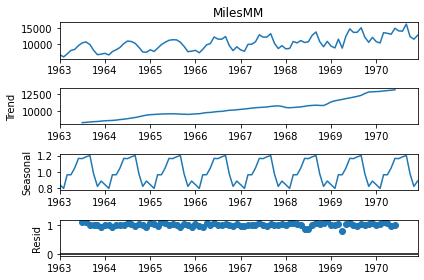

In [ ]:
mresult=seasonal_decompose(miles['MilesMM'], model = 'multiplicative')
mresult.plot()

# Differencing 

In [ ]:
miles_df=pd.read_csv('us-airlines.csv', parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [ ]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)
miles_df['diff_lag1']=miles_df['MilesMM'].diff(periods=1)
miles_df.index=miles_df.Month
miles_df.head()

,Month,MilesMM,lag1,diff_lag1
Month,,,,
1963-01-01,1963-01-01,6827,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0
1963-03-01,1963-03-01,7084,6178.0,906.0
1963-04-01,1963-04-01,8162,7084.0,1078.0
1963-05-01,1963-05-01,8462,8162.0,300.0


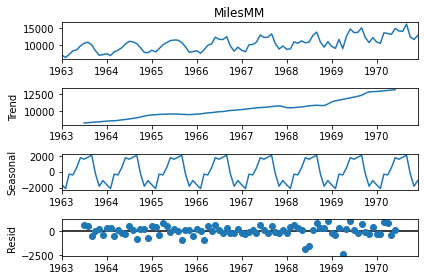

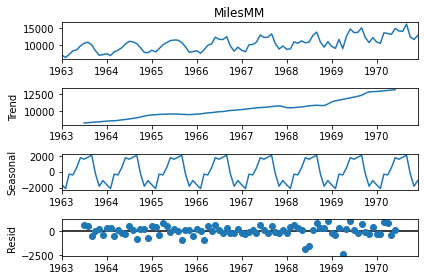

In [ ]:
resl_a=seasonal_decompose(miles_df['MilesMM'], model='additive')
resl_a.plot()

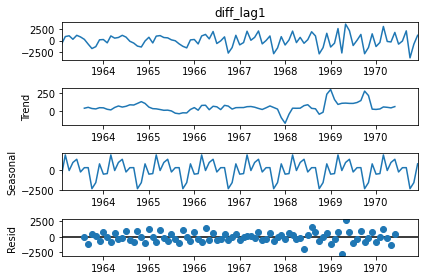

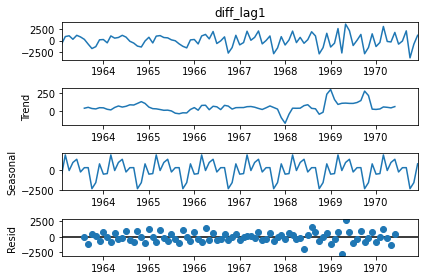

In [ ]:
resl_b=seasonal_decompose(miles_df.iloc[1:,3], model='additive')
resl_b.plot()

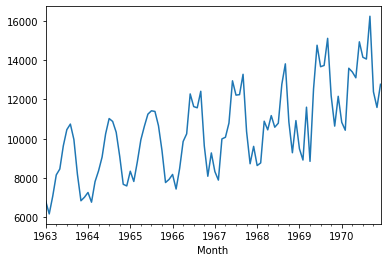

In [ ]:
miles_df['MilesMM'].plot()

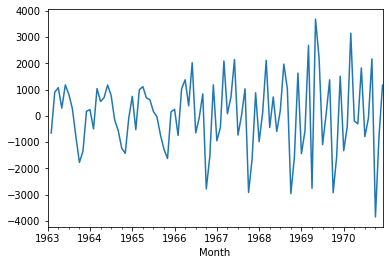

In [ ]:
miles_df['diff_lag1'].plot()

*Note that we still have seasonality*

In [ ]:
miles_df['diff_lag12']=miles_df['diff_lag1'].diff(periods=12)
miles_df.head(15)

,Month,MilesMM,lag1,diff_lag1,diff_lag12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


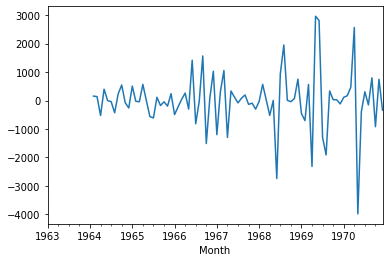

In [ ]:
miles_df['diff_lag12'].plot()

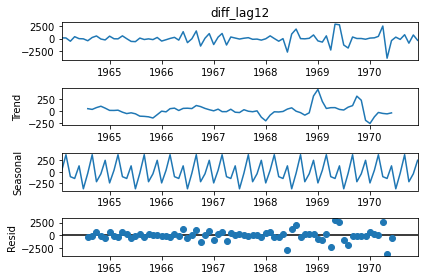

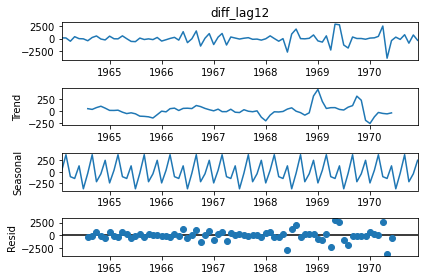

In [ ]:
resl=seasonal_decompose(miles_df.iloc[13:,4], model='additive')
resl.plot()

# Test-Train Split

In [ ]:
tempdata=pd.read_csv('min_temp.csv', parse_dates=[0])
tempdata.head() #total 10 years

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
tempdata.shape

(3650, 2)

In [ ]:
train_size=int(tempdata.shape[0]*0.8)
train_set=tempdata[:train_size]

In [ ]:
test_set=tempdata[train_size:]

In [ ]:
test_set.shape

(730, 2)

# 

# Naive Forecast Model

In [ ]:
df=pd.read_csv('min_temp.csv', parse_dates=[0])

In [ ]:
df['t']=df['Temp'].shift(1)
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [ ]:
train_size=int(df.shape[0]-7)
train_set=df[1:train_size]
test_set=df[train_size:]

In [ ]:
train_x,train_y = train_set['t'], train_set['Temp']
test_x, test_y = test_set['t'], test_set['Temp']

Walk Forward Validation

In [ ]:
prediction=test_x.copy()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
n_err = mse(test_y, prediction)

In [ ]:
print(n_err)

3.4228571428571413


In [ ]:
from matplotlib import pyplot as plt

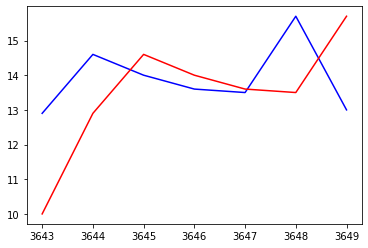

In [ ]:
plt.plot(test_y, color='b')
plt.plot(prediction, color='r')
plt.show()

# Auto Regression

In [ ]:
data=pd.read_csv('min_temp.csv', parse_dates=[0])
train=data.Temp[1:data.shape[0]-7]
test=data.Temp[data.shape[0]-7:]

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
model = AR(train)
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


No. lag variables that hold importance

In [ ]:
model_fit.k_ar

29

Co-efficients of Lag values

In [ ]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [ ]:
prediction = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
print(prediction)

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64


In [ ]:
error=mse(prediction, test_y)
print(error)

1.5015252310069378


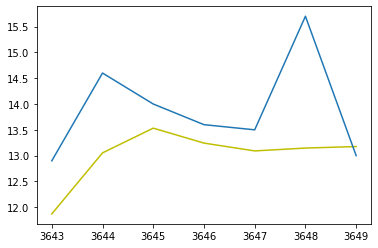

In [ ]:
prediction.plot(color='y')
test_y.plot()

# AR with Walk Forward Validation

In [ ]:
df = pd.read_csv('min_temp.csv', parse_dates=[0])
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]
data=train
predict=[]


In [ ]:
for t in test:
  model=AR(data)
  model_fit=model.fit()
  y=model_fit.predict(start=len(data), end=len(train)+len(test)-1)
  print(y.values[0])
  predict.append(y.values[0])
  data= np.append(data,t)
  data = pd.Series(data)

11.871274847727841
13.660699943835194
14.35316414409016
13.430120791626997
13.374756477185128
13.47911129942051
14.767773018439865


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


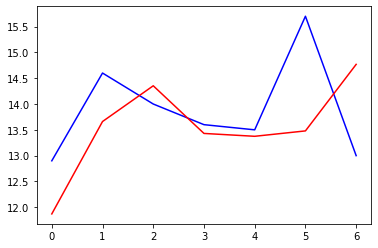

In [ ]:
plt.plot(test.values, color='b')
plt.plot(predict, color='r')

# Moving Average Model

In [ ]:
df=pd.read_csv('min_temp.csv', parse_dates=[0])

In [ ]:
df['t']=df.Temp.shift(1)

In [ ]:
df['residual']=df['Temp']-df['t'] #Lv1 as Naive model

In [ ]:
train=df.residual[1:df.shape[0]-7]
test=df.residual[df.shape[0]-7:]

In [ ]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: residual, dtype: float64

In [ ]:
model=AR(train) #Lv2 as AR model
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [ ]:
model_fit.k_ar

29

In [ ]:
model_fit.params

const          -0.006415
L1.residual    -0.407139
L2.residual    -0.496194
L3.residual    -0.445747
L4.residual    -0.403706
L5.residual    -0.362528
L6.residual    -0.334810
L7.residual    -0.288468
L8.residual    -0.274281
L9.residual    -0.235333
L10.residual   -0.234799
L11.residual   -0.228532
L12.residual   -0.208608
L13.residual   -0.180324
L14.residual   -0.178425
L15.residual   -0.152265
L16.residual   -0.143617
L17.residual   -0.132501
L18.residual   -0.097075
L19.residual   -0.104927
L20.residual   -0.079371
L21.residual   -0.059348
L22.residual   -0.045921
L23.residual   -0.063197
L24.residual   -0.063441
L25.residual   -0.045061
L26.residual   -0.023578
L27.residual   -0.011882
L28.residual   -0.003789
L29.residual   -0.003422
dtype: float64

In [ ]:
pred_resid=model_fit.predict(start=len(train), end=len(test)+len(train)-1)
prediction=df.t[df.shape[0]-7:]+pred_resid

In [ ]:
prediction

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [ ]:
error = mse(prediction, test_y)
error

2.049398556648208

Lower error values than Naive, thus can as say not a random walk.
But AR and AR with Walk forward had even lower error values

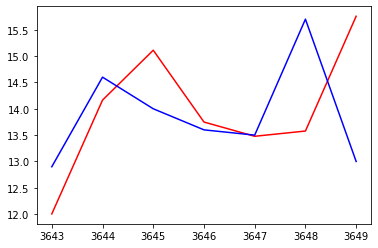

In [ ]:
prediction.plot(color='r')
test_y.plot(color='b')

# ARIMA

In [ ]:
df=pd.read_csv('shampoo.csv', parse_dates=[0])
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


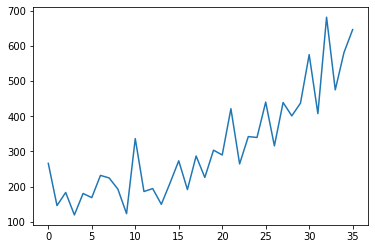

In [ ]:
df.Sales.plot()

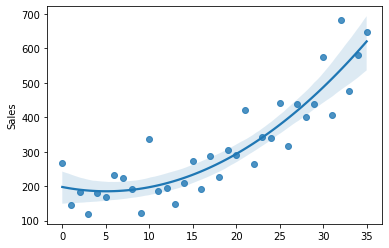

In [ ]:
sns.regplot(x=df.index.values, y=df.Sales, order=2)

Trend is Quadratic, D=2

**Auto Correlation Plot**

In [ ]:
from  pandas.plotting import autocorrelation_plot as ap

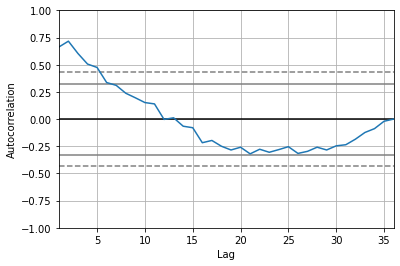

In [ ]:
ap(df.Sales)

Till nearly Lag 5 variable, we see the higher correlation, thus No. of lag variables used is 5 ---- q=5

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

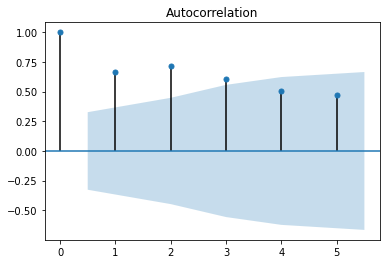

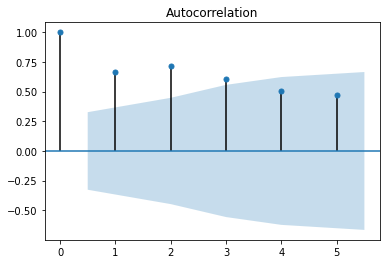

In [ ]:
plot_acf(df.Sales, lags=5)

**Partial Auto Corelation Plot**

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

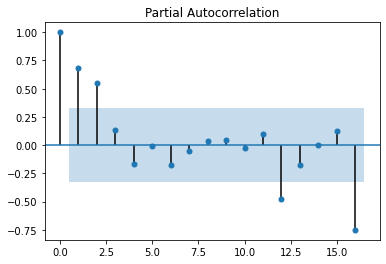

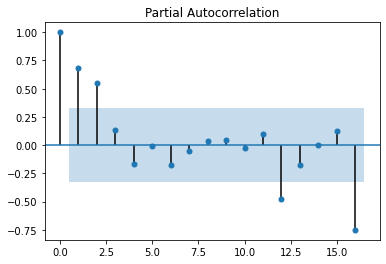

In [ ]:
plot_pacf(df.Sales)

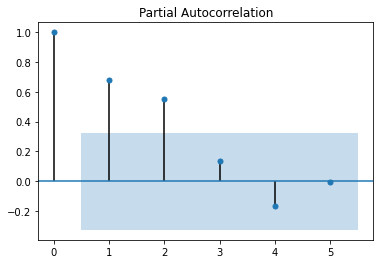

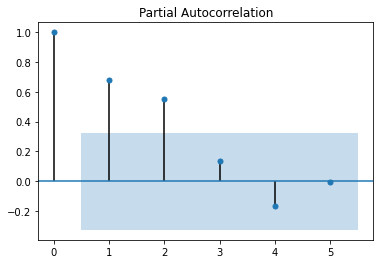

In [ ]:
plot_pacf(df.Sales, lags=5)

Dropping below the 95% confidence interval after lag 2, so p=2

**Building ARIMA**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df.Sales,order = (2,2,3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -187.842
Method:                       css-mle   S.D. of innovations             49.751
Date:                Tue, 23 Aug 2022   AIC                            389.683
Time:                        02:46:39   BIC                            400.368
Sample:                             2   HQIC                           393.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9216      0.101      9.090      0.000       0.723       1.120
ar.L1.D2.Sales    -1.4817      0.138    -10.704      0.000      -1.753      -1.210
ar.L2.D2.Sales    -0.5607      0.139

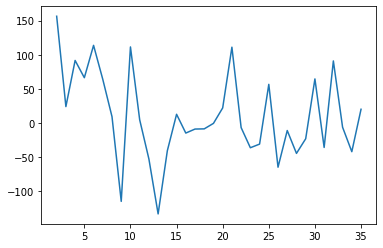

In [ ]:
residual=model_fit.resid
residual.plot()

In [ ]:
residual.describe()

count     34.000000
mean       9.954774
std       65.408446
min     -133.518319
25%      -34.811184
50%       -3.561502
75%       61.996852
max      156.378362
dtype: float64

In [ ]:
output=model_fit.forecast()
output #Output gives 3 arrays: First is the forecast, Second Standard Deviation, Third is the Confidence Interval

(array([615.47560468]),
 array([49.75131967]),
 array([[517.96480994, 712.98639942]]))

In [ ]:
#test = df.Lag1[1:]
#test.tail()

In [ ]:
model_fit.forecast(5)

(array([615.47560468, 691.36452985, 685.38983898, 743.34227645,
        755.28154626]),
 array([49.75131967, 54.92103705, 55.59203958, 55.70860444, 55.98634659]),
 array([[517.96480994, 712.98639942],
        [583.72127525, 799.00778445],
        [576.43144357, 794.34823439],
        [634.15541812, 852.52913478],
        [645.55032331, 865.0127692 ]]))

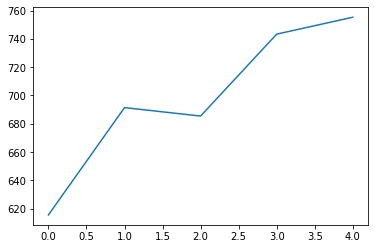

In [ ]:
plt.plot(model_fit.forecast(5)[0])

# Walk Forward ARIMA

In [ ]:
df=pd.read_csv('shampoo.csv', parse_dates=[0])

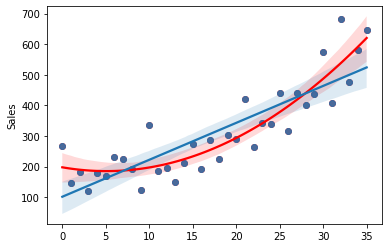

In [ ]:
sns.regplot(x=df.index.values, y=df.Sales, order=2, color='r')
sns.regplot(x=df.index.values, y=df.Sales, order=1)

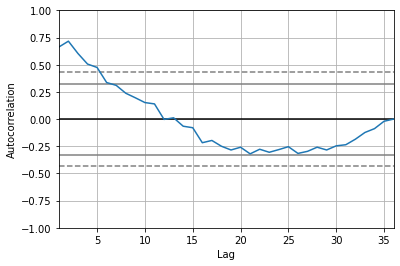

In [ ]:
ap(df.Sales)

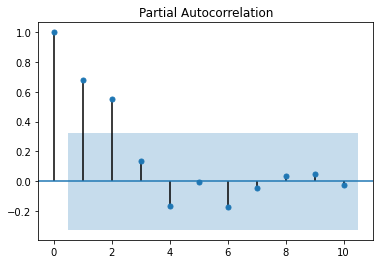

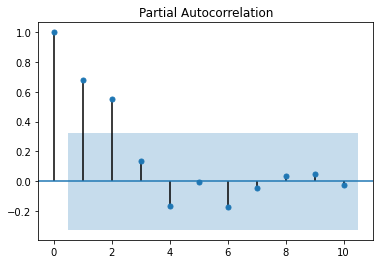

In [ ]:
plot_pacf(df.Sales, lags=10)

In [ ]:
train_size=int(df.shape[0]*0.7)
train, test = df.Sales[:train_size], df.Sales[train_size:]

In [ ]:
print(test.shape)

(11,)


In [ ]:
data=train
predict=[]
for t in test:
  model=ARIMA(data, order=(6,2,0))
  model_fit=model.fit()
  y=model_fit.forecast()
  print(y[0][0])
  predict.append(y[0][0])
  data = np.append(data,t)
  data = pd.Series(data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


424.94240492830477
388.3606985706482
405.9631278697394
375.52055666976554
454.86433560829846
439.55653640052185
493.75818001222746
552.5212690900062
490.5833447078206
737.0685166851456
616.2367727805208


In [ ]:
print(len(predict))

11


In [ ]:
error=mse(test.values, predict)
error #ARIMA model

6879.696708963529

In [ ]:
data=train
predict=[]
for t in test:
  model=AR(data)
  model_fit=model.fit()
  y=model_fit.predict(start=len(data), end=len(test)+len(train)-1)
  print(y.values[0])
  predict.append(y.values[0])
  data = np.append(data,t)
  data = pd.Series(data)

437.7714857151182
387.4993267077037
399.2470366148318
372.91049551579613
458.27748034795786
417.5900197891617
474.30093611662664
563.4713359608681
470.7796435197622
753.0945063758924
672.4027002529599


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [ ]:
error=mse(test.values, predict)
print(error) #AR model

7417.93094459766


In [ ]:
df["lag"]=df.Sales.shift(1)
test = df.lag[1:]
error = mse(test, df.Sales[1:])
print(error) #Naive Model

11715.388285714285


# SARIMA

SARIMA(p,d,q)(P,D,Q)m
p,d,q - trend
P,D,Q - season

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df=pd.read_csv('us-airlines.csv', parse_dates=[0])
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


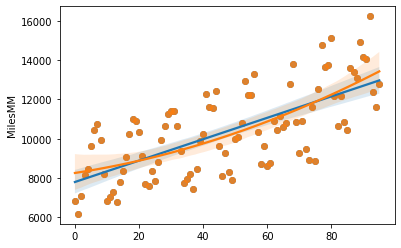

In [ ]:
sns.regplot(x=df.index.values, y=df.MilesMM, order=1)
sns.regplot(x=df.index.values, y=df.MilesMM, order=2)

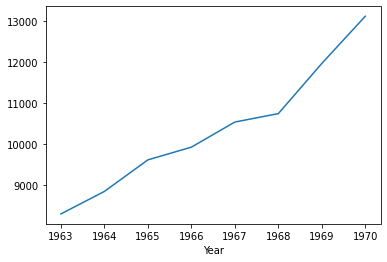

In [ ]:
df["Year"]=df.Month.dt.year
yearly_plot=df.groupby("Year")['MilesMM'].mean()
yearly_plot.plot()

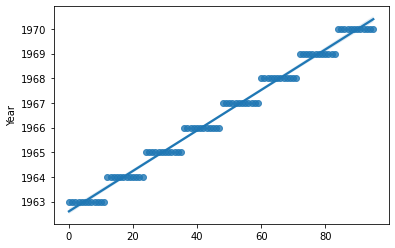

In [ ]:
sns.regplot(x=df.index.values, y=df.Year, order=1)

**Oberve** Check the trend after suppressing seasonality. You'll get mislead with the seasonality present while reg-plot

In [ ]:
df.index=df.Month

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

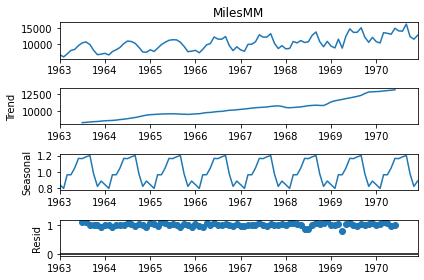

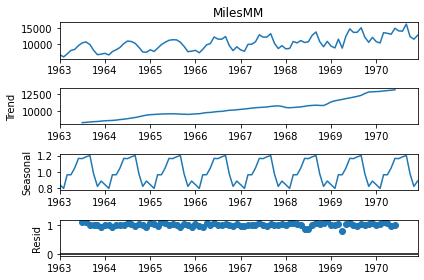

In [ ]:
result=seasonal_decompose(df.MilesMM, model='multiplicative')
result.plot()

From the decomposition, we see the liner trend i.e. d=1 and m=12(Yearly Seasonality)

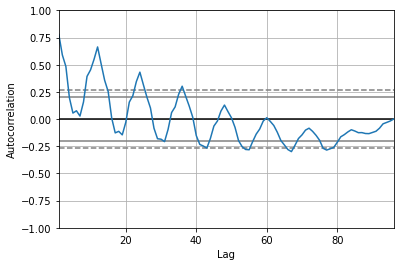

In [ ]:
ap(df.MilesMM)

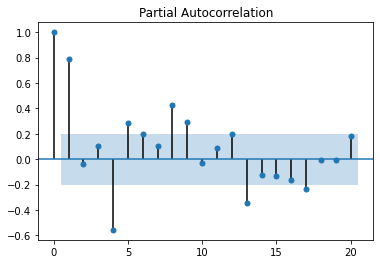

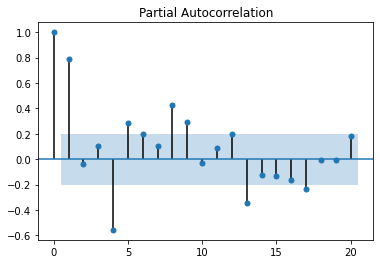

In [ ]:
plot_pacf(df.MilesMM)

In [ ]:
model=SARIMAX(df.MilesMM, order=(4,1,1), seasonal_order=(1,1,1,12))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
residual=model_fit.resid

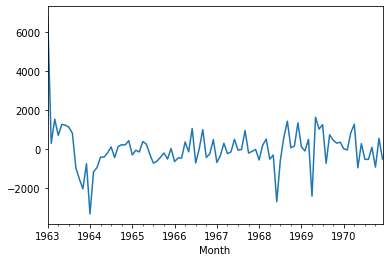

In [ ]:
residual.plot()

In [ ]:
op=model_fit.forecast()
op

1971-01-01    11233.422297
Freq: MS, dtype: float64

In [ ]:
pred=model_fit.forecast(7)

In [ ]:
yhat=model_fit.predict()
yhat

1963-01-01        0.000000
1963-02-01     5895.781380
1963-03-01     5556.268424
1963-04-01     7465.158350
1963-05-01     7201.939650
                  ...     
1970-08-01    14602.038029
1970-09-01    16155.128650
1970-10-01    13329.821871
1970-11-01    11054.787752
1970-12-01    13296.911625
Freq: MS, Name: predicted_mean, Length: 96, dtype: float64

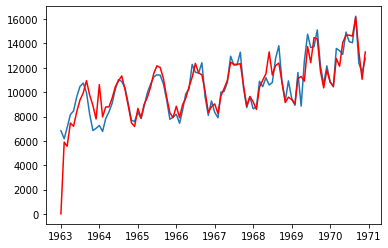

In [ ]:
plt.plot(df.MilesMM)
plt.plot(yhat, color='r')

In [ ]:
error = mse(yhat, df.MilesMM)
print(error)

1211973.149265997


In [ ]:
#error = mse(pred, df["MilesMM"][df.shape[0]-7:])
#print(error)